# Final Project

### 獲取歷史資料

In [1]:
from finlab.data import Data

data = Data()

rev = data.get("當月營收")
close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

#財務指標
PB = data.get("股價淨值比")
pe = data.get("本益比")

rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

bargin_i=data.get("投信買賣超股數")
bargin_f=data.get("外資自營商買賣超股數")
bargin_s=data.get("自營商買賣超股數(自行買賣)")


rev.index = rev.index.shift(5, "d")

### 計算features


In [2]:
#取不同週期的數值
#https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/60f5cb2ae1ae0b000727f4dc　添加技術指標
#k,d = data.talib("STOCH", fastk_period=5,slowk_period=3,slowk_matype=3,slowd_period=1,slowd_matype=1)

#talib.STOCH()
MFI  = data.talib("MFI")
#MFI  = OBV.resample('d').sum()
#MFI.loc[(MFI!=0).any(1)]
#MFI.to_csv("MFI.csv")
MFI.tail()


,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2022-08-19,0.0,52.231657,68.402694,67.542649,78.534854,0.0,81.550251,40.934128,74.082838,0.0,...,59.578722,58.720546,64.557472,81.771806,67.260540,66.412552,67.978033,23.088733,78.980196,66.258214
2022-08-22,0.0,56.067296,73.061636,69.367418,74.195333,0.0,79.856444,42.634889,71.129799,0.0,...,61.049647,56.268458,64.891805,38.913399,68.936253,74.298888,65.616838,27.027303,80.078309,69.220943
2022-08-23,0.0,48.420876,48.012613,63.744010,68.984740,0.0,79.350832,39.460557,76.927966,0.0,...,65.010237,59.120882,61.162197,25.925592,69.085646,68.123630,52.522662,30.621380,80.332894,71.249557
2022-08-24,0.0,42.737247,52.548094,58.735881,63.910795,0.0,76.169846,39.323160,73.192360,0.0,...,75.410327,65.953072,66.630045,34.904968,65.153168,73.180819,69.062200,35.679768,81.256743,75.404675
2022-08-25,0.0,40.641584,51.943545,54.030384,60.492061,0.0,72.990270,36.749410,73.263157,0.0,...,75.723338,64.298832,64.305588,33.252625,62.064250,64.558895,77.796338,33.371654,80.734777,74.889436


In [3]:
##取不同週期的數值
##https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/60f5cb2ae1ae0b000727f4dc　添加技術指標
##k,d = data.talib("STOCH", fastk_period=5,slowk_period=3,slowk_matype=3,slowd_period=1,slowd_matype=1)
#
##talib.STOCH()
#BBANDS  = data.talib("BBANDS")
#BBANDS  = OBV.resample('d').sum()
#
#
#BBANDS.loc[(BBANDS!=0).any(1)]
#
##MFI.to_csv("MFI.csv")
#
#BBANDS.tail()
#

In [4]:
#ub,md,lb=data.talib('BBANDS')
##close.to_csv("close.csv")

In [5]:
#test =  pe
#test

In [6]:
#test.reset_index(drop=True,)
#test.reset_index(names=['date', 'names'])
#
##t1 = t1.reset_index(drop=True)
#test

In [7]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1

def bi_(n):
    return (bargin_i / vol.shift(1)).shift(n)

def bf(n):
    return (bargin_f / vol.shift(1)).shift(n)
    
def bs(n):
    return (bargin_s / vol.shift(1)).shift(n)

def rsi(n):
    return talib_all_stock(ndays=10000, func=abstract.RSI, timeperiod=60)


features = {
    
    "MFI":MFI,
    
#    'ADX':talib.ADX,
#    'vol':vol,
#    'ub':ub,
    'Adosc3':data.talib('ADOSC',timeperiod=3),
    
    'PB':PB,
    'PE':pe,    
    
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'yoy': yoy(1),
    'delta_yoy':(yoy(1)/yoy(2))-1,
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
#    'acc5': acc(5),
#    'acc10': acc(10),
#    'acc20': acc(20),
#    'acc60': acc(60),
#    'acc120': acc(120),
#    'acc240': acc(240),
#    
#    
#    'bi1':bi_(1),
#    'bi5':bi_(5),
#    'bi10':bi_(10),
#    'bi20':bi_(20),
#       
#       
#    'bf1':bf(1),
#    'bf5':bf(5),
#    'bf10':bf(10),
#    'bf20':bf(20),
#       
#       
#    'bs1':bs(1),
#    'bs5':bs(5),
#    'bs10':bs(10),
#    'bs20':bs(20),
    
    
    
    
    
#    'rsv5': rsv(5),
#    'rsv10': rsv(10),
#    'rsv20': rsv(20),
#    'rsv60': rsv(60),
#    'rsv120': rsv(120),
#    'rsv240': rsv(240),
} 

#features['yoy'].tail() rev.shift(12).tail()

In [8]:
sorted(features)


['Adosc3',
 'MFI',
 'PB',
 'PE',
 'bias10',
 'bias120',
 'bias20',
 'bias240',
 'bias5',
 'bias60',
 'delta_yoy',
 'mom1',
 'mom2',
 'mom3',
 'mom4',
 'mom5',
 'mom6',
 'mom7',
 'mom8',
 'mom9',
 'yoy']

In [9]:
###SVM用
#from finlab import ml
#from finlab.data import Data
#
#data = Data()
#rsi = data.talib("RSI")
#
#dataset = ml.fundamental_features()
#ml.add_feature(dataset, 'RSI', rsi)

In [10]:
#from finlab.data import Data
#data = Data()
#rsi = data.talib("RSI")
#
#
#rsi.index.levels[1].name = 'date'
#rsi.index.levels[0].name = 'stock_id'
#
#rsi

In [11]:
#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

### 製作dataset

##### 設定買賣頻率

In [12]:
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-01-15', '2022-02-15', '2022-03-15', '2022-04-15',
               '2022-05-15', '2022-06-15', '2022-07-15', '2022-08-15',
               '2022-09-15', '2022-10-15'],
              dtype='datetime64[ns]', name='date', length=213, freq=None)

##### 將dataframe 組裝起來

In [13]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [14]:

for name, f in features.items():
    features[name] = f.unstack()

In [15]:
import pandas as pd
dataset = pd.DataFrame(features)

In [16]:
feature_names = list(dataset.columns)

In [17]:
#############################

In [18]:
dataset.columns

Index(['MFI', 'Adosc3', 'PB', 'PE', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5',
       'mom6', 'mom7', 'mom8', 'mom9', 'yoy', 'delta_yoy', 'bias5', 'bias10',
       'bias20', 'bias60', 'bias120', 'bias240'],
      dtype='object')

In [41]:
dataset.columns
features2 = ['PB', 'MFI'] #['R103_ROE稅後', 'R402_營業毛利成長率']
dataset2 = dataset[features2].dropna(how='any')
dataset2.head()

PB        MFI
     date                       
1101 2010-01-15  1.47  61.673428
     2010-02-15  1.26  37.707935
     2010-03-15  1.25  38.954723
     2010-04-15  1.30  59.902587
     2010-05-15  1.10  31.929560

In [42]:
import finlab.ml as ml

ml.add_profit_prediction(dataset2)
dataset2.head()

D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  all_index = (df.index | item.index).sort_values()
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  all_index = (df.index | item.index).sort_values()
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  all_index = (df.index | item.index).sort_values()
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will

PB        MFI    return
     date                                 
1101 2010-01-15  1.47  61.673428  0.877193
     2010-02-15  1.26  37.707935  0.988333
     2010-03-15  1.25  38.954723  1.028668
     2010-04-15  1.30  59.902587  0.865574
     2010-05-15  1.10  31.929560  1.045455

<AxesSubplot:xlabel='PB', ylabel='MFI'>

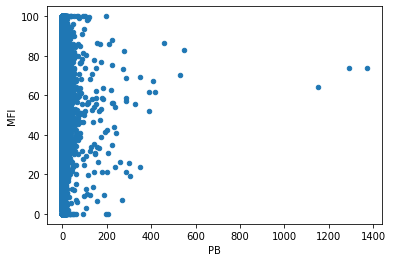

In [43]:
%matplotlib inline
dataset2.plot.scatter(features2[0], features2[1])

<AxesSubplot:>

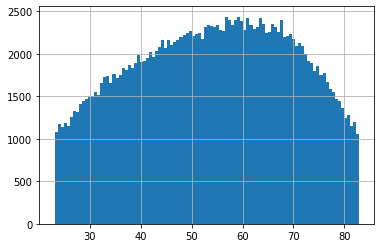

In [63]:
def is_valid(feature2, nstd):
    ub = feature2.mean() + nstd * feature2.std()
    lb = feature2.mean() - nstd * feature2.std()

    return (feature2 > lb) & (feature2 <ub)

valid = is_valid(dataset2['PB'], 0.5) & is_valid(dataset2['MFI'], 1.5)
dataset_rmoutliers = dataset2[valid].dropna()

dataset_rmoutliers['MFI'].hist(bins=100)
#dataset_rmoutliers['delta_yoy'].hist(bins=100)  # R409_淨值成長率', 'R408_資產總額成長率

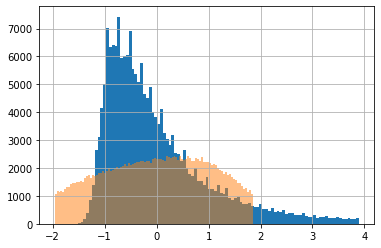

In [64]:
import pandas as pd
import sklearn.preprocessing as preprocessing

dataset_scaled = pd.DataFrame(preprocessing.scale(dataset_rmoutliers), index=dataset_rmoutliers.index, columns=dataset_rmoutliers.columns)
dataset_scaled.head()

dataset_scaled['PB'].hist(bins=100)
dataset_scaled['MFI'].hist(bins=100, alpha=0.5)
dataset_scaled['return'] = dataset_rmoutliers['return']


In [65]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset_scaled, test_size=0.1, random_state=0)

from sklearn.svm import SVC

cf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
         decision_function_shape='ovr', degree=3, gamma='auto',
         kernel='linear', max_iter=-1, probability=False, random_state=None,
         shrinking=True, tol=0.001, verbose=False)

cf.fit(dataset_train[features2], dataset_train['return'] > dataset_train['return'].quantile(0.5))

SVC(gamma='auto', kernel='linear')

C:\Users\User\.conda\envs\finlab\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\User\.conda\envs\finlab\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


<AxesSubplot:>

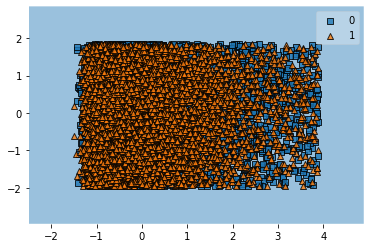

In [66]:
from mlxtend.plotting import plot_decision_regions

features_plot = dataset_test[features2].values
labels_plot = (dataset_test['return'] > dataset_test['return'].quantile(0.5)).astype(int).values

plot_decision_regions(features_plot, labels_plot, cf)

<AxesSubplot:>

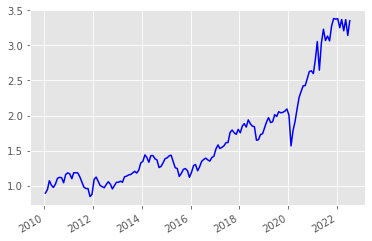

In [67]:
history = dataset_test.copy()
history['svm prediction'] = cf.predict(dataset_test[features2])
history = history.reset_index()

dates = sorted(list(set(history['date'])))

seasonal_returns1 = []
seasonal_returns2 = []
for date in dates:
    current_stocks = history[history['date'] == date]
    buy_stocks = current_stocks[current_stocks['svm prediction'] == True]
    sell_stocks = current_stocks[current_stocks['svm prediction'] == False]
    
    seasonal_return1 = buy_stocks['return'].mean()
    seasonal_returns1.append(seasonal_return1)
    
    seasonal_return2 = sell_stocks['return'].mean()
    seasonal_returns2.append(seasonal_return2)

import matplotlib.pyplot as plt
plt.style.use("ggplot")

pd.Series(seasonal_returns1, index=dates).cumprod().plot(color='red')
pd.Series(seasonal_returns2, index=dates).cumprod().plot(color='blue')

In [68]:
##########################

In [69]:
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

### 新增 label

In [ ]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

### 刪除太大太小的歷史資料

In [ ]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset,list1, thresh=0.01)

print(dataset_drop_extreme_case.shape)

In [ ]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [ ]:
dataset_drop_extreme_case.index.get_level_values("date")

In [ ]:
dataset_train = dataset_dropna.loc[:'2021']
dataset_test = dataset_dropna.loc['2022':]

### 神經網路模型

In [ ]:
import os

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train['rank'],
                    batch_size=100, #1000
                    epochs=30, #225
                    verbose=1,
                    validation_split=0.1, )


### 結果

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

### lightgbm Model

In [38]:
import lightgbm as lgb
cf = lgb.LGBMRegressor(n_estimators=5000)
cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

LGBMRegressor(n_estimators=5000)

In [43]:
train = dataset_train[feature_names] , dataset_train['return'] > 1
test = dataset_test[feature_names] , dataset_test['return'] > 1 

cf.fit(*train)
cf.score(*test)
cf.predict(test[0])

array([0.47834074, 0.53328325, 0.2050005 , ..., 0.9747842 , 0.61213151,
       0.26271385])

In [47]:
#cf.score(*test)

-0.1357118121728329

In [44]:
import lightgbm as lgb

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 500

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum

clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(*train, **fit_params)



Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[9]	valid's auc: 0.501641
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.497796
[200]	valid's auc: 0.501667
Early stopping, best iteration is:
[180]	valid's auc: 0.501953
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.487916
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.509506
Early stopping, best iteration is:
[98]	valid's auc: 0.509522
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.498933
Early stopping, best iteration is:
[152]	valid's auc: 0.502725
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.502439
[200]	valid's auc: 0.50752
[300]	valid's auc: 0.509628
Early stopping, best iteration is:
[289]	valid's auc: 0.510

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='None', n_estimators=5000,
                                            n_jobs=4, random_state=314),
                   n_iter=500,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019DE560CD08>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019DE560C048>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019DE55F8788>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
         

In [46]:
gs.best_estimator_

LGBMClassifier(colsample_bytree=0.9731668400523877, metric='None',
               min_child_samples=171, min_child_weight=1e-05, n_estimators=5000,
               n_jobs=4, num_leaves=41, random_state=314, reg_alpha=10,
               reg_lambda=100, subsample=0.5575732396028996)

In [49]:
cf = lgb.LGBMRegressor(colsample_bytree=0.9731668400523877, metric='None',
                       min_child_samples=171, min_child_weight=1e-05, n_estimators=5000,
                       n_jobs=4, num_leaves=41, random_state=314, reg_alpha=10,
                       reg_lambda=100, subsample=0.5575732396028996)

               #colsample_bytree=0.9731668400523877, metric='None',
               #min_child_samples=171, min_child_weight=1e-05, n_estimators=5000,
               #n_jobs=4, num_leaves=41, random_state=314, reg_alpha=10,
               #reg_lambda=100, subsample=0.5575732396028996
                
cf.fit(dataset_train[feature_names],dataset_train['return'] > 1, **fit_params)
cf.score(dataset_test[feature_names],dataset_test['return'] > 1)

Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.498533
Early stopping, best iteration is:
[115]	valid's auc: 0.500645


-0.0763411454711389

### Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=1000)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

RandomForestRegressor(n_estimators=1000)

<AxesSubplot:xlabel='Value', ylabel='Feature'>

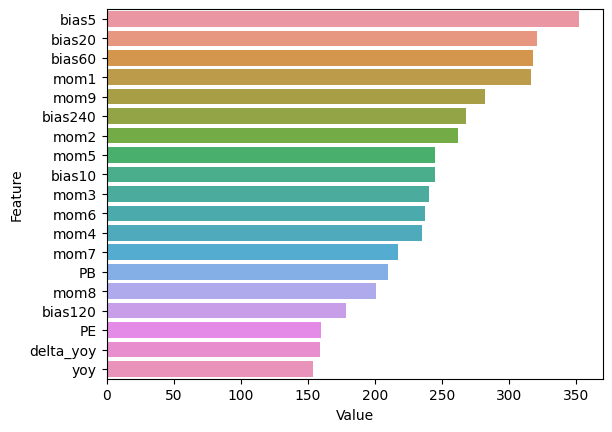

In [51]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

### Ensemble learning

In [52]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

NameError: name 'model' is not defined

# backtest

In [ ]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time,list1, thresh=0.01)
    
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2022':].cumprod()

s0050 = close['0050']['2022':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



### 當月持股狀況

In [ ]:
dataset.index.levels[1]

In [ ]:
# get the latest dataset
last_date = "2022-09-15"#dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset,list1, thresh=0.01)


# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
slist1 = rank[condition].reset_index()['stock_id']

# 平均分配資產於股票之中

In [ ]:
close = data.get("收盤價")

money = 50000*1
stock_prices = close[rank[condition].reset_index()['stock_id']].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000
